## Resolución del problema del puzzle-8 mediante búsqueda heurística

### Objetivos de la actividad

Con esta actividad vas a conseguir implementar la estrategia de búsqueda heurística A* para la resolución del problema del puzzle-8.

### Descripción de la implementación 

Para implementar el algoritmo de búsqueda basado en heurística de A* se utilizan los siguientes elementos:

-  Se implenta una clase nodo que contiene la información de cada nodo del arbol con la siguiente información:
    - Matriz de las fichas (Ubicación de los numeros)
    - Información del nodo padre
    - Valor de costo del nodo con tres valores:
        - h es la cantidad de fichas que no están ubicadas en el lugar definido en el estdo final
        - g es la profundidad del nodo en el árbol
        - f es el valor de costo total que es la sumatorio de los otros dos valores 
        
- Se implementan las funciones auxiliares para la ejecución del algoritmo:
    - <b>funcion_evaluacion</b>: clacul la cantidad de diferencias en las números de la posición dada al estdo final esperado
    - <b>mover_ficha</b>: genera los posibles movimiento de acuerdo a las reglas establecidas (ARRIBA, ABAJO, IZQUIERDA, DERECHA) validando que el movimiento esté dentro de las fronteras del tablero.
    - <b>buscar_en_lista</b>: Busca un tablero específico en la lista dada
    

In [36]:
# Cargar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Se crea una arreglo en numpy con el estado inicial
estado_inicial = np.array([[2,8,3],[1,6,4],[7,0,5]])

In [38]:
# Se crea una arreglo en numpy con el estado final
estado_final = np.array([[1,2,3],[8,0,4],[7,6,5]])

In [39]:
# Máximo de iteraciones a ejecutar
MAX_ITERACIONES = 100

In [40]:
# Se implementa la función de evaluación que mide la cantidad de posiciones con valores incorrectos
def funcion_evaluacion(estado_actual, estado_final):
    estados = np.absolute(estado_final - estado_actual)
    return np.count_nonzero(estados)

In [41]:
# Se crea una clase para almacenar los datos de cada nodo del arbol
class nodo:
    def __init__ (self, estado_juego, nodo_padre):
        self.juego = estado_juego # Almacena la matriz con el etsado del tablero
        self.nodo_padre = nodo_padre # Almacena la información del nodo padre
        self.f = 0 # Valor de la función de evaluación
        self.g = 0 # la profundidad del nodo
        self.h = 0 # Cantidad de números diferentes con respecto al estado final

In [62]:
# se crean las operaciones de movimiento

def mover_ficha(estado_juego):
    
    #Se ubica la posición del espacio vacío (valor cero)     
    posicion_vacia = np.argwhere((np.asarray(estado_juego.juego+1))<2)
    
    # se obtiene la fila y la columna donde está la casilla vacía.
    x = posicion_vacia[0,0]
    y = posicion_vacia[0,1]
    
    # Se crea la lista para almacenar los nodos posibles según las reglas de movimiento definidas
    rama_arbol = []
    
    # Se ejecutan la prueba de los cuatro movimientos posibles y se cargan como nodos del árbol, solo se agregan los movimientos
    # que están dentro de las fornteras del tablero.
        
    # Moviemiento hacia arriba
    if x-1 >= 0:
        nodo_temporal = np.copy(estado_juego.juego)
        nodo_temporal[x][y]=nodo_temporal[x-1][y]
        nodo_temporal[x-1][y]=0
        rama_arbol.append(nodo(nodo_temporal,estado_juego.nodo_padre))
        
     # Moviemiento hacia abajo
    if x+1 < 3:
        nodo_temporal = np.copy(estado_juego.juego)
        nodo_temporal[x][y]=nodo_temporal[x+1][y]
        nodo_temporal[x+1][y]=0
        rama_arbol.append(nodo(nodo_temporal,estado_juego.nodo_padre))

     # Moviemiento hacia la derecha
    if y-1 >= 0:
        nodo_temporal = np.copy(estado_juego.juego)
        nodo_temporal[x][y]=nodo_temporal[x][y-1]
        nodo_temporal[x][y-1]=0
        rama_arbol.append(nodo(nodo_temporal,estado_juego.nodo_padre))

    # Moviemiento hacia la izquierda
    if y+1 < 3:
        nodo_temporal = np.copy(estado_juego.juego)
        nodo_temporal[x][y]=nodo_temporal[x][y+1]
        nodo_temporal[x][y+1]=0
        rama_arbol.append(nodo(nodo_temporal,estado_juego.nodo_padre))

    return rama_arbol    

In [63]:
# Se crea una función para buscar si un juego está en una lista
def buscar_en_lista(nodo, lista):
    for index, elemento in enumerate(lista):
        if np.array_equal(nodo.juego, elemento.juego):
            return index
     
    return -1

In [70]:
# Ejecución del algoritmo
lista_abierta = []
lista_cerrada = []
    
# Se agrega en la raíz del árbol el juego inicial - estado de inicialización
juego_actual = nodo(estado_inicial,None)
lista_abierta.append(juego_actual)

# se iniciaiza la variable de control para evitar loops infinitos
iteraciones = 0

# el algoritmo se ejecuta hasta alcanzar el estado final o el máximo de iteraciones.
while (funcion_evaluacion(juego_actual.juego ,estado_final) >0) and (iteraciones < MAX_ITERACIONES):

    if not lista_abierta:
        print('No se logró encontrar solución')
        break
    
    juego_actual = lista_abierta[0]
    lista_abierta.pop(0)
    lista_cerrada.append(juego_actual)

    # Se crea el moviento de fichas del tablero 
    rama_actual = mover_ficha(juego_actual)
    
    for nod in rama_actual:
        if buscar_en_lista(nod,lista_cerrada) < 0:
            profundidad_arbol = juego_actual.g + 1 
            j=buscar_en_lista(nod,lista_abierta)
            if j >= 0:
                # Se actualiza el nodo existente
                if profundidad_arbol < lista_abierta[j].g:
                    lista_abierta[j].g = profundidad_arbol
                    lista_abierta[j].f = lista_abierta[j].g + lista_abierta[j].h
                    lista_abierta[j].nodo_padre = juego_actual                
            else:
                # Se agrega la información al nodo
                nod.g = profundidad_arbol
                nod.h = funcion_evaluacion(nod.juego, estado_final)
                nod.f = nod.g + nod.h
                nod.nodo_padre = juego_actual
                
                # Se agrega el nodo a la lista abierta
                lista_abierta.append(nod)  
                lista_abierta.sort(key = lambda x:x.f,reverse=False)                 

    iteraciones+=1

print('se ejecutaron ' + str(iteraciones) + ' iteraciones')

se ejecutaron 7 iteraciones


In [75]:
# Se imprime la lista de nodos de la lista cerrada
paso = 0
for item in lista_cerrada:
    print ("Paso: " + str(paso), end =" ")
    print ('  f:' + str(item.f), end =" ")
    print ('  h:' + str(item.h), end =" ")
    print ('  g:' + str(item.g))
    print ('nodo:')
    print (np.asarray(item.juego)) 
    print ('-----------------  '),
    paso += 1

Paso: 0   f:0   h:0   g:0
nodo:
[[2 8 3]
 [1 6 4]
 [7 0 5]]
-----------------  
Paso: 1   f:4   h:3   g:1
nodo:
[[2 8 3]
 [1 0 4]
 [7 6 5]]
-----------------  
Paso: 2   f:6   h:4   g:2
nodo:
[[2 0 3]
 [1 8 4]
 [7 6 5]]
-----------------  
Paso: 3   f:6   h:4   g:2
nodo:
[[2 8 3]
 [0 1 4]
 [7 6 5]]
-----------------  
Paso: 4   f:6   h:3   g:3
nodo:
[[0 2 3]
 [1 8 4]
 [7 6 5]]
-----------------  
Paso: 5   f:6   h:2   g:4
nodo:
[[1 2 3]
 [0 8 4]
 [7 6 5]]
-----------------  
Paso: 6   f:5   h:0   g:5
nodo:
[[1 2 3]
 [8 0 4]
 [7 6 5]]
-----------------  


Esta es una representación del árbol generado con el sitio: http://tristanpenman.com/demos/n-puzzle/

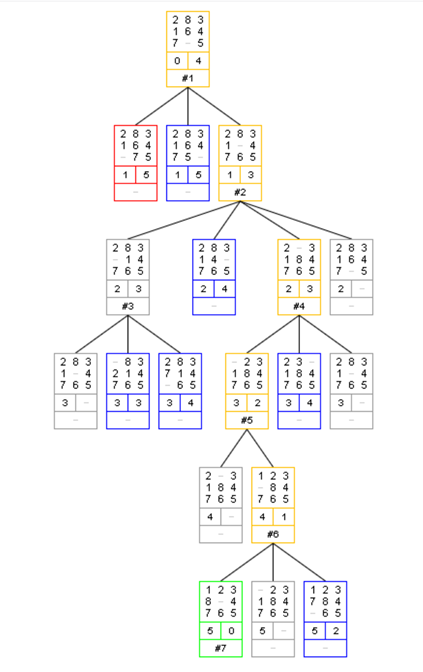